# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.051249e+01     9.515926e+00
 * time: 0.0018198490142822266
     1     2.793295e+01     6.857729e+00
 * time: 0.0060939788818359375
     2     1.957518e+01     5.828561e+00
 * time: 0.013493061065673828
     3     1.383630e+01     3.711312e+00
 * time: 0.020396947860717773
     4     1.277554e+01     4.788501e+00
 * time: 0.024905920028686523
     5     1.247453e+01     3.752197e+00
 * time: 0.029227018356323242
     6     1.052917e+01     1.996609e+00
 * time: 0.03415393829345703
     7     9.239873e+00     1.588950e+00
 * time: 0.03986001014709473
     8     8.837536e+00     1.009264e+00
 * time: 0.04558396339416504
     9     8.819047e+00     1.669664e+00
 * time: 0.05086994171142578
    10     8.761811e+00     1.122656e+00
 * time: 0.055793046951293945
    11     8.693536e+00     9.612600e-01
 * time: 0.06057095527648926
    12     8.571449e+00     6.862901e-01
 * time: 0.06555294990539551
    13     8.487387e+00     9.094566e-01

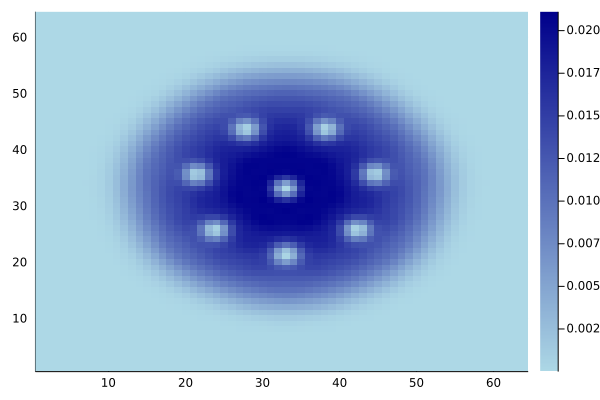

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)